#**Archisha Sinha**
##Topic: Genetic Algorithm
##Domain: Intelligent Systems

##GENETIC ALGORITHM

Genetic algorithm is a population-based probabilistic search and optimization technique, which works based on the mechanisms of natural genetics and natural evaluation.

Steps in GA
1. Random population is created with a group of individuals.
2. Each individual is evaluated and given a score based on how well they perform a given task
4. Evaluation function is developed by programmer
5. Two individuals are selected based on their fitness
6. One or more offsprings are evaluated
7. Good offsprings replace bad individuals
8. Some of them are mutated randomly
9. Continue till suitable solution has been found or a fixed number of generations are passed (programmer decides this)
10. GA Parameters
11. Initial population size: N
12. Size of mating pool, Np : Np = p%of N
13. Convergence threshold δ
14. Mutation µ  
15. Inversion η  
16. Crossover ρ


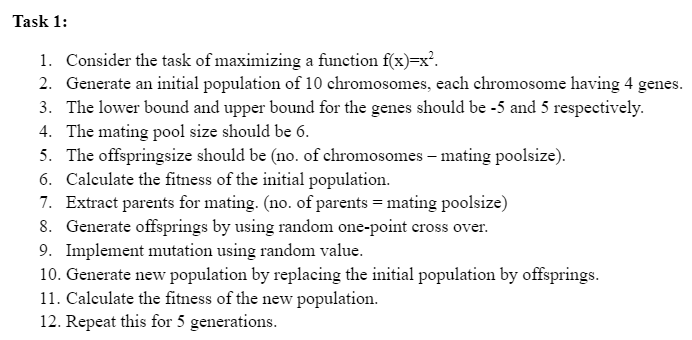

In [ ]:
import numpy

genes=4
chromosomes=10
matingpoolsize=6
offspringsize=chromosomes-matingpoolsize
lb=-5
ub=5
populationsize=(chromosomes,genes)

In [ ]:
population= numpy.random.uniform(lb, ub, populationsize)
population

array([[-4.97212856, -2.34168277,  3.13825189,  1.91667432],
       [-0.10416823, -2.32388545, -1.24979495, -0.14073787],
       [ 1.76254462,  3.47618363, -2.91887875,  3.27848932],
       [-3.35407055,  3.78962069, -0.33089167, -1.09339841],
       [-0.08049425, -2.14458107, -3.4216608 ,  2.80389902],
       [-2.88345454,  0.95239969,  2.07945317, -1.1818268 ],
       [-0.30277082,  3.49706934, -4.5824567 , -1.82349066],
       [ 3.7923734 , -0.74657041,  1.23852375,  0.4431206 ],
       [ 3.17626946, -1.30615339, -1.95795138,  2.02253766],
       [-0.75006606, -2.42171439, -1.89862232,  3.48791832]])

In [ ]:
fitness_population=numpy.sum(population[0]*population[0])
fitness_population

43.72780595720351

In [ ]:
fitness=numpy.sum(population*population,axis=1)
fitness

array([43.72780596,  6.99308919, 34.45876156, 26.91602358, 24.17531962,
       14.94221531, 36.64519182, 16.66976029, 19.71895655, 22.19764058])

In [ ]:
parents=numpy.empty((matingpoolsize,population.shape[1]))
parents

array([[-0.25, -0.5 ,  0.  , -0.25],
       [ 0.25, -0.5 ,  0.5 , -0.25],
       [ 0.25,  0.  ,  0.5 ,  0.25],
       [ 0.25,  0.5 ,  0.  ,  0.25],
       [-0.25,  0.5 , -0.5 ,  0.25],
       [-0.25,  0.  , -0.5 , -0.25]])

In [ ]:
for p in range(matingpoolsize):
  fittest_index=numpy.where(fitness == numpy.max(fitness))
  fittest_index=fittest_index[0][0]
  parents[p,:]=population[fittest_index,:]
  fitness[fittest_index]=-1

print("Parents: ")
print(parents)

Parents: 
[[-4.97212856 -2.34168277  3.13825189  1.91667432]
 [-0.30277082  3.49706934 -4.5824567  -1.82349066]
 [ 1.76254462  3.47618363 -2.91887875  3.27848932]
 [-3.35407055  3.78962069 -0.33089167 -1.09339841]
 [-0.08049425 -2.14458107 -3.4216608   2.80389902]
 [-0.75006606 -2.42171439 -1.89862232  3.48791832]]


In [ ]:
offspring=numpy.empty((offspringsize,population.shape[1]))
offspring

array([[6.84106487e-310, 4.67189121e-310, 6.84104439e-310,
        6.84104439e-310],
       [6.84104439e-310, 6.84106455e-310, 6.84104438e-310,
        6.84104439e-310],
       [6.84104439e-310, 6.84104439e-310, 6.84106455e-310,
        6.84104439e-310],
       [6.84104439e-310, 6.84104439e-310, 6.84104439e-310,
        6.84104439e-310]])

In [ ]:
for k in range(offspringsize):
  crossoverpoint=numpy.random.randint(0,genes)
  print(crossoverpoint)

  parent_I_index=k%parents.shape[0]

  parent_II_index=(k+1)%parents.shape[0]

  offspring[k, 0:crossoverpoint]=parents[parent_I_index, 0:crossoverpoint]
  offspring[k,crossoverpoint : ]=parents[parent_II_index,crossoverpoint : ]

print("Offspring After Crossover: ")
print(offspring)

0
3
2
3
Offspring After Crossover: 
[[-0.30277082  3.49706934 -4.5824567  -1.82349066]
 [-0.30277082  3.49706934 -4.5824567   3.27848932]
 [ 1.76254462  3.47618363 -0.33089167 -1.09339841]
 [-3.35407055  3.78962069 -0.33089167  2.80389902]]


In [ ]:
for index in range(offspring.shape[0]):
  random_index=numpy.random.randint(1,genes)
  random_value=numpy.random.randint(lb,ub,1)

  offspring[index,random_index]=offspring[index,random_index]+random_value

print("Offspring After Mutation: ")
print(offspring)

Offspring After Mutation: 
[[-0.30277082  0.49706934 -4.5824567  -1.82349066]
 [-0.30277082  3.49706934 -4.5824567   0.27848932]
 [ 1.76254462  3.47618363  0.66910833 -1.09339841]
 [-3.35407055  3.78962069  3.66910833  2.80389902]]


<ipython-input-9-b139923332f7>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring[index,random_index]=offspring[index,random_index]+random_value


In [ ]:
population[0:parents.shape[0], :]=parents
population[parents.shape[0]:, :]=offspring

print("Population for Next gen")
print(population)

Population for Next gen
[[-4.97212856 -2.34168277  3.13825189  1.91667432]
 [-0.30277082  3.49706934 -4.5824567  -1.82349066]
 [ 1.76254462  3.47618363 -2.91887875  3.27848932]
 [-3.35407055  3.78962069 -0.33089167 -1.09339841]
 [-0.08049425 -2.14458107 -3.4216608   2.80389902]
 [-0.75006606 -2.42171439 -1.89862232  3.48791832]
 [-0.30277082  0.49706934 -4.5824567  -1.82349066]
 [-0.30277082  3.49706934 -4.5824567   0.27848932]
 [ 1.76254462  3.47618363  0.66910833 -1.09339841]
 [-3.35407055  3.78962069  3.66910833  2.80389902]]


In [ ]:
fitness = numpy.sum(population*population, axis=1)
print(fitness)

fittest_index=numpy.where(fitness==numpy.max(fitness))
fittest_index=fittest_index[0][0]
fittest_ind=population[fittest_index, :]
bestfitness =fitness[fittest_index]
print("Best Indiviual: ")
print(fittest_ind)
print("Best Indiviual's Fitness: ")
print(bestfitness)

[43.72780596 36.64519182 34.45876156 26.91602358 24.17531962 22.19764058
 24.66277575 33.39762992 16.8336422  46.93521988]
Best Indiviual: 
[-3.35407055  3.78962069  3.66910833  2.80389902]
Best Indiviual's Fitness: 
46.93521987816621


In [ ]:
import numpy

# Parameter initialization
genes = 4
chromosomes = 10
mattingPoolSize = 6
offspringSize = chromosomes - mattingPoolSize
lb = -5
ub = 5
populationSize = (chromosomes, genes)
#generations = 3

#Population initialization
population = numpy.random.uniform(lb, ub, populationSize)

In [ ]:
fitness_population = numpy.sum(population[0]*population[0])

In [ ]:
fitness = numpy.sum(population*population, axis=1)

In [ ]:
parents = numpy.empty((mattingPoolSize, population.shape[1]))

In [ ]:
for p in range(mattingPoolSize):
  fittestIndex = numpy.where(fitness == numpy.max(fitness))
  fittestIndex = fittestIndex[0][0]
  parents[p, :] -= population[fittestIndex, :]
  fitness[fittestIndex] = -1
print("\nParents:")
print(parents)


Parents:
[[ 9.80990291  7.13389174  1.76213124  3.98288375]
 [ 3.80886654 -0.6432345   6.76306682  5.62983337]
 [ 4.31768575  6.98135189 -0.94290554  5.08591428]
 [ 7.61216755  0.08109565 -0.93436269 -0.46702677]
 [ 3.18131216  3.09090647  5.71489254  7.18695361]
 [ 0.2316528   5.78825404  5.14257948  3.07858435]]


In [ ]:
offspring = numpy.empty((offspringSize, population.shape[1]))
offspring

array([[0.30277082, 0.49706934, 4.5824567 , 1.82349066],
       [0.30277082, 3.49706934, 4.5824567 , 0.27848932],
       [1.76254462, 3.47618363, 0.66910833, 1.09339841],
       [3.35407055, 3.78962069, 3.66910833, 2.80389902]])

In [ ]:
for k in range(offspringSize):
  crossoverPoint = numpy.random.randint(0,genes)
  print(crossoverPoint)

  parent1Index = k%parents.shape[0]

  parent2Index = (k+1)%parents.shape[0]

  offspring[k, 0: crossoverPoint] = parents[parent1Index, 0: crossoverPoint]

  offspring[k, crossoverPoint:] = parents[parent2Index, crossoverPoint:]
print("\nOffspring after crossover:")
print(offspring)

1
1
3
3

Offspring after crossover:
[[ 9.80990291 -0.6432345   6.76306682  5.62983337]
 [ 3.80886654  6.98135189 -0.94290554  5.08591428]
 [ 4.31768575  6.98135189 -0.94290554 -0.46702677]
 [ 7.61216755  0.08109565 -0.93436269  7.18695361]]


In [ ]:
for index in range(offspring.shape[0]):
  randomIndex = numpy.random.randint(1,genes)
  randomValue = numpy.random.uniform(lb, ub, 1)
  offspring [index, randomIndex] = offspring [index, randomIndex] + randomValue
  print("\n Offspring after Mutation")
  print(offspring)


 Offspring after Mutation
[[ 9.80990291 -0.6432345   6.76306682  9.0574724 ]
 [ 3.80886654  6.98135189 -0.94290554  5.08591428]
 [ 4.31768575  6.98135189 -0.94290554 -0.46702677]
 [ 7.61216755  0.08109565 -0.93436269  7.18695361]]

 Offspring after Mutation
[[ 9.80990291 -0.6432345   6.76306682  9.0574724 ]
 [ 3.80886654  6.98135189 -5.79036948  5.08591428]
 [ 4.31768575  6.98135189 -0.94290554 -0.46702677]
 [ 7.61216755  0.08109565 -0.93436269  7.18695361]]

 Offspring after Mutation
[[ 9.80990291 -0.6432345   6.76306682  9.0574724 ]
 [ 3.80886654  6.98135189 -5.79036948  5.08591428]
 [ 4.31768575  6.98135189 -1.78637687 -0.46702677]
 [ 7.61216755  0.08109565 -0.93436269  7.18695361]]

 Offspring after Mutation
[[ 9.80990291 -0.6432345   6.76306682  9.0574724 ]
 [ 3.80886654  6.98135189 -5.79036948  5.08591428]
 [ 4.31768575  6.98135189 -1.78637687 -0.46702677]
 [ 7.61216755  0.08109565 -0.93436269  8.26112542]]


<ipython-input-19-e3da22b67e5c>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring [index, randomIndex] = offspring [index, randomIndex] + randomValue


In [ ]:
parents.shape[0]
population[0:parents.shape[0], :] = parents
population[parents.shape[0]:, :] = offspring
print("\nNew Population for next generation:")
print(population)


New Population for next generation:
[[ 9.80990291  7.13389174  1.76213124  3.98288375]
 [ 3.80886654 -0.6432345   6.76306682  5.62983337]
 [ 4.31768575  6.98135189 -0.94290554  5.08591428]
 [ 7.61216755  0.08109565 -0.93436269 -0.46702677]
 [ 3.18131216  3.09090647  5.71489254  7.18695361]
 [ 0.2316528   5.78825404  5.14257948  3.07858435]
 [ 9.80990291 -0.6432345   6.76306682  9.0574724 ]
 [ 3.80886654  6.98135189 -5.79036948  5.08591428]
 [ 4.31768575  6.98135189 -1.78637687 -0.46702677]
 [ 7.61216755  0.08109565 -0.93436269  8.26112542]]


In [ ]:
fitness = numpy.sum(population*population, axis=1)
print(fitness)
fittestIndex = numpy.where(fitness == numpy.max(fitness))
fittestIndex = fittestIndex[0][0]
fittestInd = population[fittestIndex, :]
bestFitness = fitness[fittestIndex]
print("\nBest Individual:")
print(fittestInd)
print("\nBest Individual's Fitness:")
print(bestFitness)

[166.09507588  92.35531156  94.13727934  59.04281896 103.98674874
  69.4813532  224.42482485 122.64164127  70.79094071 127.07089817]

Best Individual:
[ 9.80990291 -0.6432345   6.76306682  9.0574724 ]

Best Individual's Fitness:
224.42482485381402


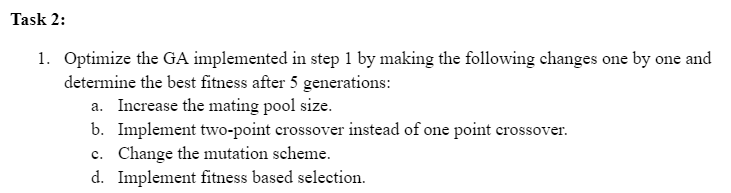

In [ ]:
# Increased mating pool size
mattingPoolSize = 8

In [ ]:
# Implementing two-point crossover
for k in range(offspringSize):
    crossoverPoints = numpy.sort(numpy.random.choice(genes, 2, replace=False))
    parent1Index = k % parents.shape[0]
    parent2Index = (k + 1) % parents.shape[0]

    offspring[k, 0:crossoverPoints[0]] = parents[parent1Index, 0:crossoverPoints[0]]
    offspring[k, crossoverPoints[0]:crossoverPoints[1]] = parents[parent2Index, crossoverPoints[0]:crossoverPoints[1]]
    offspring[k, crossoverPoints[1]:] = parents[parent1Index, crossoverPoints[1]:]


In [ ]:
# Change mutation scheme
for index in range(offspring.shape[0]):
    randomIndices = numpy.random.choice(genes, 2, replace=False)
    randomValues = numpy.random.uniform(lb, ub, 2)

    offspring[index, randomIndices] = offspring[index, randomIndices] + randomValues


In [ ]:
# Implementing fitness-based selection
for p in range(mattingPoolSize):
    # Use fitness for probabilistic selection
    probabilities = fitness / numpy.sum(fitness)
    selected_index = numpy.random.choice(chromosomes, p=probabilities)
    parents[p, :] = population[selected_index, :].copy()
    fitness[selected_index] = -1


ValueError: probabilities are not non-negative

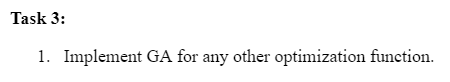

In [ ]:
import numpy as np

# Function to optimize: Sphere function
def sphere_function(x):
    return np.sum(x**2)

# Genetic Algorithm function
def genetic_algorithm(genes, chromosomes, mating_pool_size, lb, ub, generations):
    population_size = (chromosomes, genes)

    # Initialization
    population = np.random.uniform(lb, ub, population_size)
    best_fitness_history = []

    for generation in range(generations):
        # Calculate fitness
        fitness = np.sum(population**2, axis=1)

        # Select parents using fitness-based selection
        mating_pool_indices = np.random.choice(chromosomes, size=mating_pool_size, p=fitness/np.sum(fitness))
        parents = population[mating_pool_indices, :].copy()

        # Generate offspring using two-point crossover
        offspring = np.empty((chromosomes - mating_pool_size, genes))
        for k in range(offspring.shape[0]):
            crossover_points = np.sort(np.random.choice(genes, 2, replace=False))
            parent1_index = k % parents.shape[0]
            parent2_index = (k + 1) % parents.shape[0]

            offspring[k, 0:crossover_points[0]] = parents[parent1_index, 0:crossover_points[0]]
            offspring[k, crossover_points[0]:crossover_points[1]] = parents[parent2_index, crossover_points[0]:crossover_points[1]]
            offspring[k, crossover_points[1]:] = parents[parent1_index, crossover_points[1]:]

        # Mutate offspring
        mutation_rate = 0.1
        mutation_indices = np.random.rand(offspring.shape[0], genes) < mutation_rate
        random_values = np.random.uniform(lb, ub, size=(offspring.shape[0], genes))
        offspring[mutation_indices] = random_values[mutation_indices]

        # Create new population by combining parents and offspring
        new_population = np.vstack((parents, offspring))

        # Update population for the next generation
        population = new_population

        # Record best fitness in the current generation
        best_fitness = np.min(fitness)
        best_fitness_history.append(best_fitness)

    return best_fitness_history

# Parameters
genes = 5
chromosomes = 20
mating_pool_size = 10
lb = -5
ub = 5
generations = 10

# Run Genetic Algorithm
result = genetic_algorithm(genes, chromosomes, mating_pool_size, lb, ub, generations)

# Display results
print("Best Fitness History:")
print(result)


Best Fitness History:
[27.492210469909363, 19.56213556525446, 17.891458659368478, 13.429481154017143, 23.16373636669755, 29.102497824048978, 33.94667265029253, 33.94667265029253, 38.82202931544631, 34.213416766110214]
